In [19]:
import pandas as pd
import pygmt
import os

In [20]:
import warnings
warnings.filterwarnings('ignore')

## Cargar los datos

In [21]:
data= pd.read_csv('events.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24159 entries, 0 to 24158
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ev_id         24159 non-null  object 
 1   otime         24159 non-null  object 
 2   loc           24121 non-null  object 
 3   lat           24159 non-null  float64
 4   lon           24159 non-null  float64
 5   dep           24159 non-null  float64
 6   mag           24159 non-null  float64
 7   alert         11 non-null     object 
 8   url           24159 non-null  object 
 9   ev_type       24159 non-null  object 
 10  significance  24159 non-null  int64  
 11  year          24159 non-null  int64  
 12  date_str      24159 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 2.4+ MB


In [22]:
data.head()

,ev_id,otime,loc,lat,lon,dep,mag,alert,url,ev_type,significance,year,date_str
0,uu60061837,2014-03-30 12:34:39.160,"22 km S of Mammoth, Wyoming",44.772167,-110.684667,5.62,4.83,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,700,2014,2014-03-30T12:34:39.160000Z
1,us20006umx,2016-08-27 20:47:47.240,"4 km ENE of Bondurant, Wyoming",43.222600,-110.359300,12.30,4.80,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,580,2016,2016-08-27T20:47:47.240000Z
2,uu60203137,2017-06-16 00:48:46.940,"12 km E of Hebgen Lake Estates, Montana",44.781333,-111.033167,9.30,4.36,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,346,2017,2017-06-16T00:48:46.940000Z
3,mb80153724,2016-06-13 12:14:39.050,"45 km W of Hebgen Lake Estates, Montana",44.730167,-111.763667,9.95,4.34,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,291,2016,2016-06-13T12:14:39.050000Z
4,uu60497322,2022-05-11 13:32:02.230,"36 km S of Silver Gate, Montana",44.681000,-109.996333,13.95,4.22,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,300,2022,2022-05-11T13:32:02.230000Z


### Poner los datos en otime

In [23]:
data['otime'] = pd.to_datetime(data['otime'])

print (data['otime'].min())
print (data['otime'].max())


2012-01-03 10:56:11.780000
2022-09-29 23:59:13.570000


**Sismos en el 2020**

In [24]:
t_0 = pd.to_datetime(f"{'2020-01-01'} 00:00:00.00")
t_f = pd.to_datetime(f"{'2021-01-01'} 00:00:00.00")

ix = (t_0 <= data['otime']) & (data['otime'] <= t_f)
ix[ix == True]

11       True
14       True
92       True
112      True
115      True
         ... 
23931    True
23942    True
23963    True
23970    True
23973    True
Name: otime, Length: 2230, dtype: bool

**Magnitud máxima de un sismo**

In [25]:
mag_max = data['mag'].max()
mag_max

4.83

### Distribución de magnitudes

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='mag', ylabel='Count'>

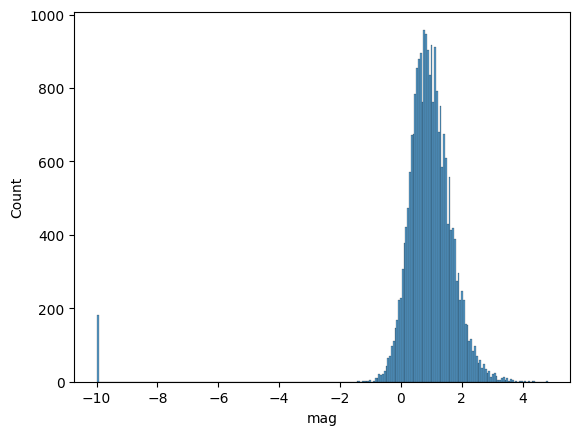

In [27]:
sns.histplot(data = data, x = 'mag')

**Vamos a eliminar outliers**

In [28]:
no_outliers = data['mag'] > -9.00
data = data[no_outliers]
data.head()

,ev_id,otime,loc,lat,lon,dep,mag,alert,url,ev_type,significance,year,date_str
0,uu60061837,2014-03-30 12:34:39.160,"22 km S of Mammoth, Wyoming",44.772167,-110.684667,5.62,4.83,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,700,2014,2014-03-30T12:34:39.160000Z
1,us20006umx,2016-08-27 20:47:47.240,"4 km ENE of Bondurant, Wyoming",43.222600,-110.359300,12.30,4.80,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,580,2016,2016-08-27T20:47:47.240000Z
2,uu60203137,2017-06-16 00:48:46.940,"12 km E of Hebgen Lake Estates, Montana",44.781333,-111.033167,9.30,4.36,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,346,2017,2017-06-16T00:48:46.940000Z
3,mb80153724,2016-06-13 12:14:39.050,"45 km W of Hebgen Lake Estates, Montana",44.730167,-111.763667,9.95,4.34,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,291,2016,2016-06-13T12:14:39.050000Z
4,uu60497322,2022-05-11 13:32:02.230,"36 km S of Silver Gate, Montana",44.681000,-109.996333,13.95,4.22,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,300,2022,2022-05-11T13:32:02.230000Z


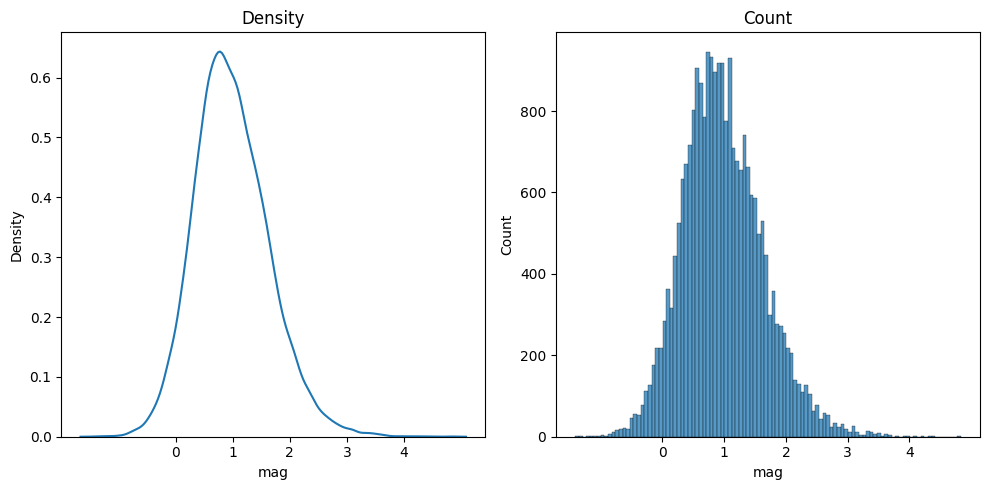

In [29]:
fig, axes = plt.subplots (ncols=2, nrows=1, figsize = (10,5))

sns.kdeplot(data = data, x = 'mag', ax=axes[0])
axes[0].set_title("Density")
axes[0].set_xticks(range(0, 5, 1))

sns.histplot(data = data, x = 'mag',ax=axes[1])
axes[1].set_title("Count")
axes[1].set_xticks(range(0, 5, 1))

plt.tight_layout()

plt.show()

## Ley de Gutenberg - Ritcher

To determine the scaling parameter `b` in the Gutenberg-Richter law from a dataframe of earthquake magnitudes, you can use a method called **maximum likelihood estimation (MLE)**. Here's a Python code snippet that demonstrates how to do this:

```python
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and 'magnitude' is the column with earthquake magnitudes
df = pd.DataFrame({'magnitude': [...]})

# Define the minimum magnitude to consider
min_magnitude = 3.0

# Filter the DataFrame to only include rows with magnitude >= min_magnitude
df = df[df['magnitude'] >= min_magnitude]

# Calculate b-value (the 'scaling parameter')
b_value = (1 / (np.mean(df['magnitude']) - min_magnitude)) * np.log(10)

print('b-value:', b_value)
```

This code first filters the dataframe to only include earthquakes with a magnitude greater than or equal to a minimum magnitude that you define. It then calculates the `b` value using the formula for maximum likelihood estimation.

Please replace `[...]` with your actual data and adjust `min_magnitude` as needed. This code assumes that the magnitudes are in a column named 'magnitude'. If your column has a different name, please adjust the code accordingly.

Remember, this is a simple estimation. For a more accurate estimation, you might want to consider more sophisticated statistical methods or packages.